# Biomechanical features of orthopedic patients
* Classifying patients based on six features

In [54]:
#IMPORTING LIBRARIES:

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier 
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [55]:
#READING THE DATASET:

data=pd.read_csv("column_2C_weka.csv")
df=data.copy()
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [56]:
#DATA EXPLORATION:

#Checking the shape of the dataset:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [57]:
#checking statistical summary:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [58]:
df.isnull().sum() #checking for null values

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [59]:
#Checking for unique values:

df["class"].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [60]:
#checking correlation:

px.imshow(df.corr(),color_continuous_scale='Sunsetdark',title="Correlation Matrix",
          width=700,height=700,template="plotly_dark")


In [61]:
#checking the distribution of the target variable:

px.histogram(df,x="class",color="class",title="Distribution of the patients class",
             width=700,height=500,template="plotly_dark",color_discrete_sequence=["#F63366","#FFC300"],
             opacity=0.8,labels={"class":"Class of patients","count":"Count of patients"})



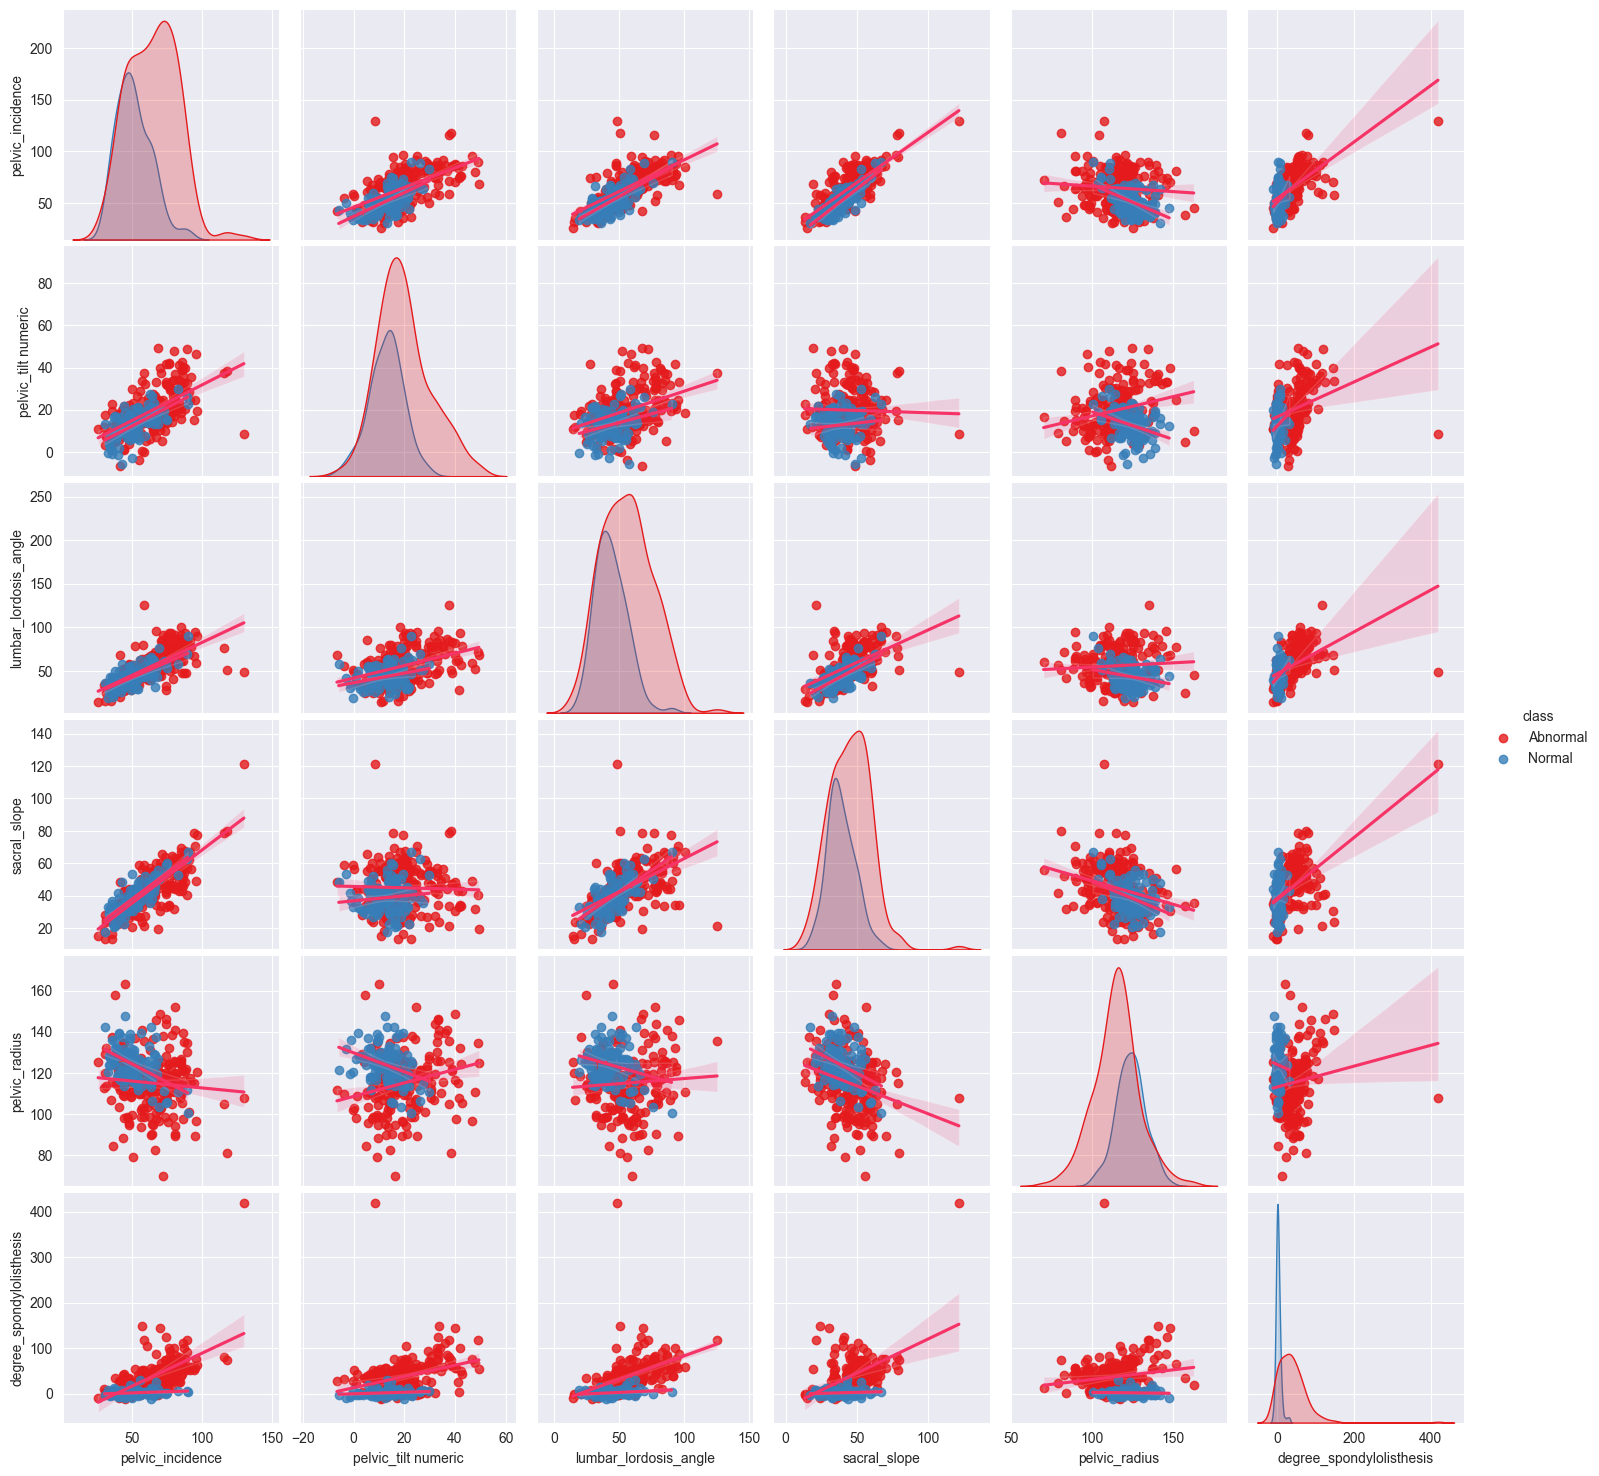

In [62]:
#distribution of the all the features:

sns.set_style("darkgrid")
sns.pairplot(df,hue="class",palette="Set1",diag_kind="kde",kind="reg",plot_kws={"line_kws":{"color":"#F63366"}})
#plot_kws={"line_kws":{"color":"#F63366"}} is used to change the color of the regression line

In [63]:
#checking outliers:

out=df.drop("class",axis=1)

for i in out.columns:
    fig=px.box(df,y=i,color="class",title="Boxplot of "+i,template="plotly_dark")
    fig.show()

# There are no remarkable outliers in the dataset. So, we can proceed further.

In [64]:
# PREPROCESSING:

#Label Encoding:

le=LabelEncoder()
df["class"]=le.fit_transform(df["class"]) # 0 for Abnormal and 1 for Normal

#standardization,normalization:

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df.iloc[:,:-1]=scaler.fit_transform(df.iloc[:,:-1])

df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0


In [65]:
#splitting the dataset:

X=df.drop("class",axis=1)
y=df["class"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [66]:
#choosing the best classification model:

models=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),
        GradientBoostingClassifier(),AdaBoostClassifier(),XGBClassifier(),LGBMClassifier()]

for model in models:
    print("Model:",model.__class__.__name__)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    print("Accuracy Score:",accuracy_score(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Cross Validation Score:",cross_val_score(model,X,y,cv=10).mean())
    print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("---------------------------------------------")
    
    

Model: LogisticRegression
Accuracy Score: 0.7956989247311828
Confusion Matrix:
 [[64  5]
 [14 10]]
Cross Validation Score: 0.7225806451612904
Mean Absolute Error: 0.20430107526881722
Mean Squared Error: 0.20430107526881722
Root Mean Squared Error: 0.45199676466631616
---------------------------------------------
Model: KNeighborsClassifier
Accuracy Score: 0.7634408602150538
Confusion Matrix:
 [[59 10]
 [12 12]]
Cross Validation Score: 0.7677419354838709
Mean Absolute Error: 0.23655913978494625
Mean Squared Error: 0.23655913978494625
Root Mean Squared Error: 0.48637345711392005
---------------------------------------------
Model: SVC
Accuracy Score: 0.8064516129032258
Confusion Matrix:
 [[59 10]
 [ 8 16]]
Cross Validation Score: 0.8129032258064516
Mean Absolute Error: 0.1935483870967742
Mean Squared Error: 0.1935483870967742
Root Mean Squared Error: 0.43994134506405985
---------------------------------------------
Model: DecisionTreeClassifier
Accuracy Score: 0.8279569892473119
Confusio

# after evaluating the models, we can say that the best model is LGBM with 0.83 accuracy.

In [67]:
# Model tuning:

lgbm_params={"learning_rate":[0.01,0.1,0.5,1],
             "n_estimators":[100,200,500,1000],
             "max_depth":[1,2,3,4,5,6,7,8,9,10],
             "num_leaves":[25,31,40,50,60,70,80,90,100]}

grid=GridSearchCV(LGBMClassifier(),lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

print("Best Parameters:",grid.best_params_)

Fitting 10 folds for each of 1440 candidates, totalling 14400 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 25}


In [68]:
#final model:

lgbm_tuned=LGBMClassifier(learning_rate=0.1,max_depth=3,n_estimators=100,num_leaves=25)
lgbm_tuned.fit(X_train,y_train)

y_pred=lgbm_tuned.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Cross Validation Score:",cross_val_score(lgbm_tuned,X,y,cv=10).mean())
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("classification_report:\n",classification_report(y_test,y_pred))
px.imshow(confusion_matrix(y_test,y_pred),color_continuous_scale='Sunsetdark',title="Confusion Matrix",
            width=700,height=700,template="plotly_dark")

Accuracy Score: 0.8494623655913979
Cross Validation Score: 0.8064516129032258
Mean Absolute Error: 0.15053763440860216
Mean Squared Error: 0.15053763440860216
classification_report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        69
           1       0.71      0.71      0.71        24

    accuracy                           0.85        93
   macro avg       0.80      0.80      0.80        93
weighted avg       0.85      0.85      0.85        93



# After model tuning the accuracy score is increased to 0.85.

In [69]:
#Feature Importance:

feature_imp=pd.Series(lgbm_tuned.feature_importances_,index=X.columns).sort_values(ascending=False)

px.bar(feature_imp,x=feature_imp.index,y=feature_imp.values,color=feature_imp.values,title="Feature Importance",template="plotly_dark",
       labels={"index":"Features","y":"Importance"})

In [78]:
#prediction results:
df2=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df2.head(20)

,Actual,Predicted
289,1,1
9,0,1
57,0,1
60,0,0
25,0,0
63,0,0
92,0,0
184,0,0
244,1,0
46,0,0
